In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("zomato.csv") # importing the csv file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.isnull().any() # checking for the null values

url                            False
address                        False
name                           False
online_order                   False
book_table                     False
rate                            True
votes                          False
phone                           True
location                        True
rest_type                       True
dish_liked                      True
cuisines                        True
approx_cost(for two people)     True
reviews_list                   False
menu_item                      False
listed_in(type)                False
listed_in(city)                False
dtype: bool

In [5]:
#What are the top 5 cuisines in the dataset?
df["cuisines"].value_counts().head()

cuisines
North Indian             2913
North Indian, Chinese    2385
South Indian             1828
Biryani                   918
Bakery, Desserts          911
Name: count, dtype: int64

In [6]:
#How many restaurants are there in each city?
df.groupby("location")["name"].count()

location
BTM                  5124
Banashankari          906
Banaswadi             664
Bannerghatta Road    1630
Basavanagudi          684
                     ... 
West Bangalore          6
Whitefield           2144
Wilson Garden         246
Yelahanka               6
Yeshwantpur           119
Name: name, Length: 93, dtype: int64

In [7]:
#What is the distribution of restaurant ratings?
ndf = df.copy()
for i in ndf.index:
    try:
        ndf.loc[i,"rate"] = float(ndf.loc[i,"rate"][:3])
    except:
        ndf.loc[i,"rate"]=1
ndf.rate.max(),ndf.rate.min()

(4.9, 1)

In [8]:
df["approx_cost(for two people)"].unique() #checking for all the unique values so that we can clean the data 

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [9]:
# What is the average cost for two people in different cities
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].str.replace(",","") # eliminating commas to make it integer
df["approx_cost(for two people)"].fillna(0,inplace=True) #filling null values with 0
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].astype(np.int64) #converting to int 
df.groupby("location")["approx_cost(for two people)"].mean()

location
BTM                  394.469165
Banashankari         421.225166
Banaswadi            390.436747
Bannerghatta Road    440.141104
Basavanagudi         360.979532
                        ...    
West Bangalore       350.000000
Whitefield           595.083955
Wilson Garden        413.211382
Yelahanka            258.333333
Yeshwantpur          430.672269
Name: approx_cost(for two people), Length: 93, dtype: float64

In [10]:
# Find the correlation between various numerical features
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].astype(np.int64)
print(round(df["approx_cost(for two people)"].corr(df["votes"]),3))

0.379


In [11]:
# How many restaurants provide online table booking?
print(df["book_table"].value_counts()["Yes"],"Restaurant providing online booking")

6449 Restaurant providing online booking


In [12]:
# What is the percentage of restaurants that offer both delivery and table booking?
t=df.shape[0]
print(round((df.groupby(["book_table"])["online_order"].value_counts()["Yes","Yes"]/df.shape[0])*100,3),"% restaurant provide both delivery and table booking")

7.357 % restaurant provide both delivery and table booking


In [13]:
df.rate.unique() #checking unique value to clean data 

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
#What are the top 5 localities with the highest average restaurant ratings?
# ndd = df.copy()
df["rate"]=df["rate"].str.strip().str[:3] #getting the ratings from 5
df["rate"].fillna(1,inplace=True) #filling 1 at place of nulll
df["rate"].unique()


array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', 1,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '-',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [15]:
# filling plcae with 1 where no float value is given
for i in df.index:
    try:
        df["rate"][i]=(float(df["rate"][i]))
    except:
        df["rate"][i]=(1)

In [16]:
print(df["rate"].isna().sum()) # can see no null values are there

0


In [17]:
df.groupby("location")["rate"].mean().sort_values(ascending=False).head()

location
St. Marks Road          3.940057
Lavelle Road            3.893006
Church Street           3.871178
Sankey Road             3.855556
Rajarajeshwari Nagar        3.85
Name: rate, dtype: object

In [18]:
# What is the distribution of restaurant types ?
df.groupby("rest_type")["rest_type"].value_counts()

rest_type
Bakery                        1141
Bakery, Beverage Shop           16
Bakery, Cafe                    78
Bakery, Dessert Parlor         147
Bakery, Food Court               2
                              ... 
Sweet Shop                     468
Sweet Shop, Dessert Parlor       1
Sweet Shop, Quick Bites        178
Takeaway                       120
Takeaway, Delivery            2037
Name: count, Length: 93, dtype: int64

In [19]:
#  Which city has the highest number of quick bite restaurants?
df.groupby("location")["rest_type"].value_counts()[:,"Quick Bites"].sort_values(ascending=False)

location
BTM                 2733
HSR                  932
Marathahalli         746
Jayanagar            733
Whitefield           721
                    ... 
Race Course Road       4
South Bangalore        2
Nagarbhavi             2
Peenya                 1
Sankey Road            1
Name: count, Length: 85, dtype: int64

name
Asia Kitchen By Mainland China                                                           4.9
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine         4.9
Byg Brewski Brewing Company                                                              4.9
Punjab Grill                                                                        4.871429
Belgian Waffle Factory                                                              4.844828
                                                                                      ...   
Mirapakaya                                                                               1.0
Mirchi- The Indian Street Food Kitchen                                                   1.0
Mist N Creams                                                                            1.0
Mithai Ghar                                                                              1.0
sCoolMeal                                                        

<Axes: xlabel='rate', ylabel='Density'>

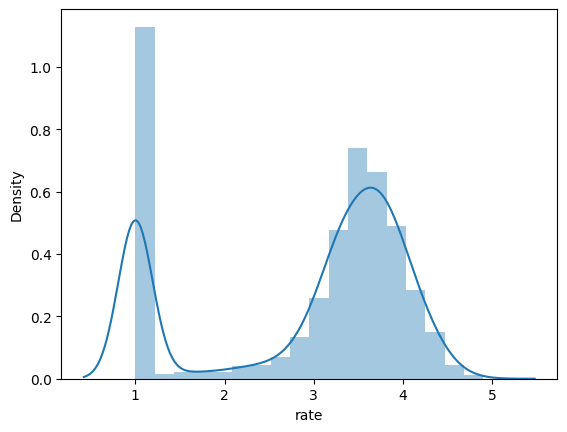

In [20]:
# Analyze the trend of average restaurant ratings over the years.
import seaborn as sns
print(df.groupby("name")["rate"].mean().sort_values(ascending=False))
sns.distplot(df.groupby("name")["rate"].mean().sort_values(ascending=False))

In [21]:
#What is the distribution of restaurant ratings for different types of cuisines?

for i in df.groupby("cuisines")["rate"]:
    print(i[0],"-->",i[1].min(),"-",i[1].max())

African, Burger --> 4.5 - 4.6
African, Burger, Desserts, Beverages, Fast Food --> 4.6 - 4.6
American --> 2.7 - 4.2
American, Asian, Continental, North Indian, South Indian, Chinese --> 4.1 - 4.1
American, Asian, European, North Indian --> 4.3 - 4.3
American, BBQ --> 4.5 - 4.5
American, Bakery, Beverages, Cafe, Healthy Food, Juices, North Indian, Sandwich --> 1.0 - 1.0
American, Burger, Fast Food --> 4.2 - 4.3
American, Burger, Italian, Steak --> 3.9 - 3.9
American, Burger, Momos, Bengali --> 3.5 - 3.5
American, Cafe, Chinese, Italian, Desserts --> 1 - 1
American, Cafe, Continental --> 4.4 - 4.4
American, Cafe, Continental, French, Burger, Mexican, Desserts, Pizza --> 4.5 - 4.5
American, Chinese --> 1 - 1
American, Chinese, Continental, North Indian --> 4.2 - 4.3
American, Continental --> 1.0 - 4.5
American, Continental, BBQ, Steak --> 4.1 - 4.2
American, Continental, Chinese --> 4.1 - 4.1
American, Continental, Fast Food, Steak --> 4.0 - 4.1
American, Continental, Finger Food --> 3.9 -

In [22]:
#How does the average cost for two people vary with restaurant ratings?
grp=df.groupby("rate")
for i in grp:
    print("\n",i[0],end=" --> ")
    print(i[1]["approx_cost(for two people)"].mean().round(2))


 1.0 --> 352.86

 1.8 --> 1200.0

 2.0 --> 1372.73

 2.1 --> 475.0

 2.2 --> 828.85

 2.3 --> 578.43

 2.4 --> 605.71

 2.5 --> 599.01

 2.6 --> 545.19

 2.7 --> 543.71

 2.8 --> 502.66

 2.9 --> 471.51

 3.0 --> 488.27

 3.1 --> 424.66

 3.2 --> 373.49

 3.3 --> 379.89

 3.4 --> 391.85

 3.5 --> 433.8

 3.6 --> 433.94

 3.7 --> 500.19

 3.8 --> 547.87

 3.9 --> 606.04

 4.0 --> 676.38

 4.1 --> 792.72

 4.2 --> 892.67

 4.3 --> 1071.33

 4.4 --> 1111.67

 4.5 --> 1138.72

 4.6 --> 1253.83

 4.7 --> 1291.32

 4.8 --> 1172.73

 4.9 --> 1274.55


In [23]:
# Explore the popularity of online delivery across different restaurant types.
df.groupby("rest_type")["online_order"].value_counts()[:,"Yes"].sort_values(ascending=False)

rest_type
Quick Bites                  11080
Casual Dining                 7032
Cafe                          2279
Delivery                      1737
Dessert Parlor                1518
                             ...  
Food Court, Beverage Shop        2
Dessert Parlor, Kiosk            2
Bakery, Beverage Shop            1
Bakery, Food Court               1
Quick Bites, Meat Shop           1
Name: count, Length: 73, dtype: int64

In [24]:
# Identify the top 5 cuisines with the highest average cost for two people.
df.sort_values("approx_cost(for two people)",ascending=False).loc[:,["cuisines","approx_cost(for two people)"]].head()

cuisines  approx_cost(for two people)
19139         French, Italian                         6000
45618         French, Italian                         6000
40266   North Indian, Mughlai                         5000
41591  Continental, Fast Food                         4500
42141  Continental, Fast Food                         4500

In [25]:
# Analyze the correlation between the number of votes and the restaurant rating.
df["votes"].corr(df["rate"])

0.3097214773368703

In [26]:
# How many restaurants offer both online delivery and outdoor seating?
c=0
for i in df.groupby("name")["listed_in(type)"]:
   
    if "Delivery" in i[1].unique() and "Dine-out" in i[1].unique():
        c+=1
print(c,"restaurants offers both online dleivery and outdoor sitting")

4487 restaurants offers both online dleivery and outdoor sitting


In [28]:
# What is the percentage of restaurants with high ratings (>= 4.5) in each city?
n = df[df["rate"]>=4.5].loc[:,["location","rate"]]
df["rate"]=df["rate"].astype(np.float64)

total = n.rate.sum()
for i in n.groupby("location")["rate"]:
    print("\n",i[0])
    
    p= (i[1].sum() / total)*100
    print(p)


 BTM
4.392271005751157

 Banashankari
0.4856922429513255

 Bannerghatta Road
0.8013045307897321

 Basavanagudi
0.3243792958339178

 Bellandur
0.5575817085145182

 Brigade Road
3.3980922990601763

 Brookefield
0.15780614391920322

 Church Street
2.779141534577079

 City Market
0.31561228783840645

 Cunningham Road
3.7417590124842186

 Electronic City
0.5593351101136204

 HSR
3.119301444802917

 Hennur
0.5523215037172113

 ITPL Main Road, Whitefield
0.08065647355870387

 Indiranagar
6.624351241408332

 JP Nagar
1.2975171833356711

 Jayanagar
2.1549305652966746

 Kalyan Nagar
2.0058914293729835

 Kammanahalli
0.31561228783840645

 Koramangala 1st Block
2.645883013045308

 Koramangala 4th Block
3.496282788609903

 Koramangala 5th Block
24.500280544255855

 Koramangala 6th Block
1.0257399354748211

 Koramangala 7th Block
5.67576097629401

 Lavelle Road
1.763922008696871

 MG Road
2.1619441716930843

 Malleshwaram
2.295202693224856

 Marathahalli
3.71896479169589

 Nagawara
0.15780614391920

In [29]:
# What is the distribution of the number of cuisines offered by restaurants?
l=[] 
for i in df.groupby("name")["cuisines"]:
    try:
        k =len(i[1].value_counts().index[0].split(","))
        l.append(k)
    except:
        pass
print("minimum",min(l),"and maximum",end=" ")
print(max(l),"cousins are offerd by restaurants")


minimum 1 and maximum 8 cousins are offerd by restaurants


In [30]:
# Analyze the popularity of different restaurant chains.
df.groupby("name")["rate"].mean().sort_values(ascending=False).head(20)

name
Asia Kitchen By Mainland China                                                      4.900000
Byg Brewski Brewing Company                                                         4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine    4.900000
Punjab Grill                                                                        4.871429
Belgian Waffle Factory                                                              4.844828
Flechazo                                                                            4.800000
O.G. Variar & Sons                                                                  4.800000
The Pizza Bakery                                                                    4.800000
Barbecue by Punjab Grill                                                            4.750000
CTR                                                                                 4.750000
The Black Pearl                                                  

In [31]:
# How does the average cost for two people vary with the restaurant type?
for i in df.groupby("rest_type")["approx_cost(for two people)"]:
    print("\n",i[0])
    print(round(i[1].mean(),2))


 Bakery
370.32

 Bakery, Beverage Shop
178.12

 Bakery, Cafe
628.85

 Bakery, Dessert Parlor
357.14

 Bakery, Food Court
500.0

 Bakery, Kiosk
323.08

 Bakery, Quick Bites
374.05

 Bakery, Sweet Shop
200.0

 Bar
1247.42

 Bar, Cafe
1000.0

 Bar, Casual Dining
1324.47

 Bar, Lounge
2450.0

 Bar, Pub
850.0

 Bar, Quick Bites
2000.0

 Beverage Shop
220.97

 Beverage Shop, Cafe
478.57

 Beverage Shop, Dessert Parlor
380.38

 Beverage Shop, Quick Bites
267.79

 Bhojanalya
300.0

 Cafe
612.66

 Cafe, Bakery
607.01

 Cafe, Bar
1200.0

 Cafe, Casual Dining
815.32

 Cafe, Dessert Parlor
663.51

 Cafe, Food Court
700.0

 Cafe, Lounge
1000.0

 Cafe, Quick Bites
536.04

 Casual Dining
786.57

 Casual Dining, Bar
1230.98

 Casual Dining, Cafe
897.81

 Casual Dining, Irani Cafee
1300.0

 Casual Dining, Lounge
1100.0

 Casual Dining, Microbrewery
1201.69

 Casual Dining, Pub
1320.47

 Casual Dining, Quick Bites
300.0

 Casual Dining, Sweet Shop
400.0

 Club
2145.95

 Club, Casual Dining
2400.0

 Con

In [32]:
# Explore the relationship between the number of cuisines and the restaurant rating.
for i in df.groupby("name"):
    print(i[1].loc[:,["name","rate","cuisines"]],"\n\n")

               name  rate   cuisines
4321   #FeelTheROLL   3.4  Fast Food
49511  #FeelTheROLL   3.4  Fast Food 


             name  rate              cuisines
10182  #L-81 Cafe   3.9  Fast Food, Beverages
11096  #L-81 Cafe   3.9  Fast Food, Beverages
16606  #L-81 Cafe   3.9  Fast Food, Beverages
17166  #L-81 Cafe   3.9  Fast Food, Beverages
28099  #L-81 Cafe   3.9  Fast Food, Beverages
29004  #L-81 Cafe   3.9  Fast Food, Beverages
30833  #L-81 Cafe   3.9  Fast Food, Beverages
33627  #L-81 Cafe   3.9  Fast Food, Beverages
36386  #L-81 Cafe   3.9  Fast Food, Beverages 


                name  rate                       cuisines
13380  #Vibes Restro   1.0  Continental, Chinese, Italian
13697  #Vibes Restro   1.0  Continental, Chinese, Italian
14109  #Vibes Restro   1.0  Continental, Chinese, Italian 


         name  rate         cuisines
885   #refuel   3.7  Cafe, Beverages
1192  #refuel   3.7  Cafe, Beverages
1967  #refuel   3.7  Cafe, Beverages 


                         name  rate  

In [34]:
#What is the distribution of the number of votes for restaurants with different ratings?
df.loc[:,["name","votes","rate"]].sort_values("votes",ascending=False).head(20)

name  votes  rate
49170  Byg Brewski Brewing Company  16832   4.9
50059  Byg Brewski Brewing Company  16832   4.9
49627  Byg Brewski Brewing Company  16832   4.9
3921   Byg Brewski Brewing Company  16345   4.9
4801   Byg Brewski Brewing Company  16345   4.9
4944   Byg Brewski Brewing Company  16345   4.9
18643                         Toit  14956   4.7
19268                         Toit  14956   4.7
36668                     Truffles  14726   4.7
33913                     Truffles  14723   4.7
34779                     Truffles  14723   4.7
36000                     Truffles  14723   4.7
32152                     Truffles  14717   4.7
33312                     Truffles  14717   4.7
31055                     Truffles  14710   4.7
29414                     Truffles  14710   4.7
29303                     Truffles  14710   4.7
28384                     Truffles  14704   4.7
27806                     Truffles  14694   4.7
26549                     Truffles  14690   4.7

In [35]:
 # How many restaurants have the option for online ordering but not online table booking?
print(df.groupby(["online_order","book_table"])["name"].count()["Yes","No"],"restaurants offer online delivery but not online table booking")

26639 restaurants offer online delivery but not online table booking


In [36]:
# Analyze the distribution of restaurant ratings for different cuisines in a specific city.
_min = df.groupby(["location","cuisines"])["rate"]
_max = df.groupby(["location","cuisines"])["rate"]
for i,j in zip(_min,_max):
    print(i[0],i[1].min()," -- ",j[1].max())

('BTM', 'American, Continental') 1.0  --  1.0
('BTM', 'Andhra') 3.6  --  3.7
('BTM', 'Andhra, Biryani') 1.0  --  4.1
('BTM', 'Andhra, Biryani, Chinese, North Indian, Seafood, South Indian') 3.5  --  3.5
('BTM', 'Andhra, Biryani, North Indian') 3.2  --  3.3
('BTM', 'Andhra, Biryani, North Indian, Chinese') 3.7  --  3.9
('BTM', 'Andhra, Chinese, Biryani') 2.6  --  2.7
('BTM', 'Andhra, Chinese, North Indian') 3.7  --  3.8
('BTM', 'Andhra, Chinese, North Indian, Biryani') 3.9  --  3.9
('BTM', 'Andhra, North Indian') 1.0  --  1.0
('BTM', 'Andhra, North Indian, Biryani') 3.7  --  3.8
('BTM', 'Andhra, North Indian, Chinese') 3.6  --  3.6
('BTM', 'Andhra, South Indian') 3.3  --  3.3
('BTM', 'Andhra, South Indian, North Indian, Biryani') 3.7  --  3.7
('BTM', 'Arabian') 1.0  --  4.1
('BTM', 'Arabian, Afghan') 3.6  --  3.7
('BTM', 'Arabian, Asian, Chinese, Afghan') 1.0  --  1.0
('BTM', 'Arabian, Chinese, Hyderabadi, Kerala') 3.2  --  3.2
('BTM', 'Arabian, Chinese, North Indian, Kerala, Juices') 3

In [37]:
# Identify the top 5 cuisines with the highest average delivery fees.// delivery fees is taken as approax cost for two people
df.sort_values("approx_cost(for two people)",ascending=False).loc[:,["cuisines","approx_cost(for two people)"]].drop_duplicates().head()

cuisines  \
19139                                    French, Italian   
40266                              North Indian, Mughlai   
41591                             Continental, Fast Food   
40262  North Indian, Continental, Japanese, Chinese, ...   
6104                                             Italian   

       approx_cost(for two people)  
19139                         6000  
40266                         5000  
41591                         4500  
40262                         4100  
6104                          4000

In [38]:
# What is the percentage of restaurants with a high rating (>= 4.5) that offer outdoor seating?---------
n= df.name.size
f = df[df.rate>=4.5]["listed_in(type)"]
t = f[f=="Dine-out"].count()
print(round((t/n)*100,2),"% of restaurant offers outdoor sitting with rate >=4.5")

0.84 % of restaurant offers outdoor sitting with rate >=4.5


In [39]:
# Analyze the distribution of average cost for two people for restaurants offering different types of cuisines.
for i in df.groupby("cuisines"):
    print(i[0],"::",i[1]["approx_cost(for two people)"].min(),"-->",i[1]["approx_cost(for two people)"].max())
    

African, Burger :: 1000 --> 1000
African, Burger, Desserts, Beverages, Fast Food :: 1000 --> 1000
American :: 250 --> 1300
American, Asian, Continental, North Indian, South Indian, Chinese :: 1200 --> 1200
American, Asian, European, North Indian :: 1400 --> 1400
American, BBQ :: 2500 --> 2500
American, Bakery, Beverages, Cafe, Healthy Food, Juices, North Indian, Sandwich :: 300 --> 300
American, Burger, Fast Food :: 400 --> 400
American, Burger, Italian, Steak :: 1700 --> 1700
American, Burger, Momos, Bengali :: 400 --> 400
American, Cafe, Chinese, Italian, Desserts :: 400 --> 400
American, Cafe, Continental :: 1700 --> 1700
American, Cafe, Continental, French, Burger, Mexican, Desserts, Pizza :: 900 --> 900
American, Chinese :: 300 --> 300
American, Chinese, Continental, North Indian :: 1200 --> 1200
American, Continental :: 200 --> 2000
American, Continental, BBQ, Steak :: 1200 --> 1200
American, Continental, Chinese :: 600 --> 600
American, Continental, Fast Food, Steak :: 1000 --> 

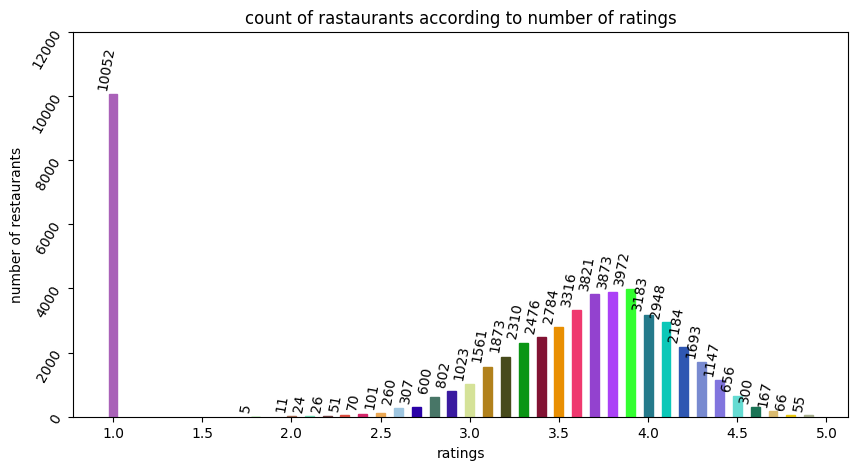

In [40]:
plt.figure(figsize=(10,5))
bars = plt.bar(x = df.rate.value_counts().index,height =df.rate.value_counts().values,width=0.05)
plt.title("count of rastaurants according to number of ratings")
plt.xlabel("ratings")
plt.ylabel("number of restaurants")
plt.yticks(rotation=60)
for i in range(df.rate.unique().size):
    bars[i].set_color((np.random.rand(),np.random.rand(),np.random.rand()))
for i in range(df.rate.unique().size):
    plt.text(df.rate.value_counts().index[i]-0.1,df.rate.value_counts().values[i]+200,df.rate.value_counts().values[i],size = 10,rotation=80)

plt.ylim(0,12000)
plt.show()

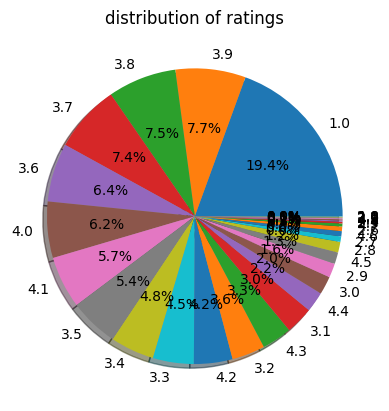

In [41]:
# ratings percentage by pie chart
plt.pie(df.rate.value_counts().values,labels = df.rate.value_counts().index,autopct = "%1.1f%%",shadow = True)

plt.title("distribution of ratings")
plt.show()